In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# setting for improving visuals appearance

sns.set(rc={'figure.figsize':(13, 10)})

In [3]:
# load data into dataframe
#Check the concise summary of the dataframe

df = pd.read_csv('HR_comma_sep.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# check for null values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [6]:
# check for duplicates

df.duplicated().sum()

3008

In [7]:
# delete duplicates

df.drop_duplicates(inplace=True)

In [8]:
# check for duplicates

df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

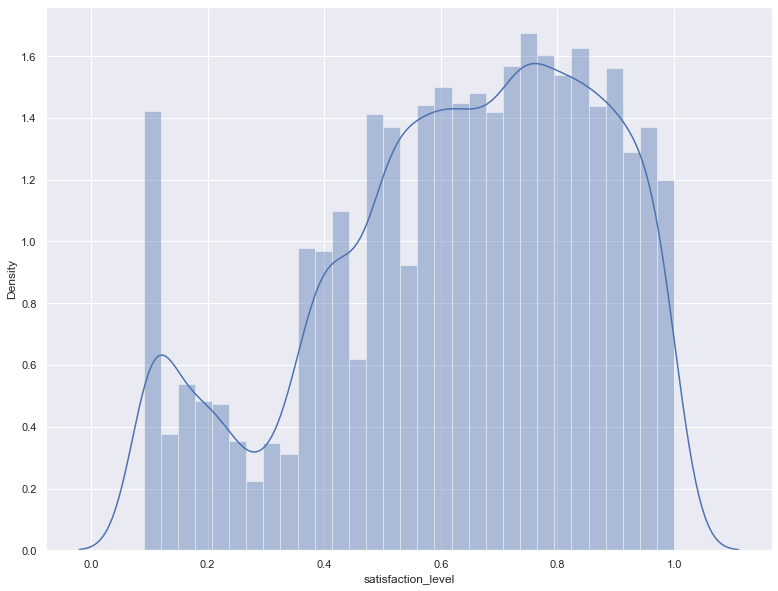

In [11]:
sns.distplot(df['satisfaction_level'])

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

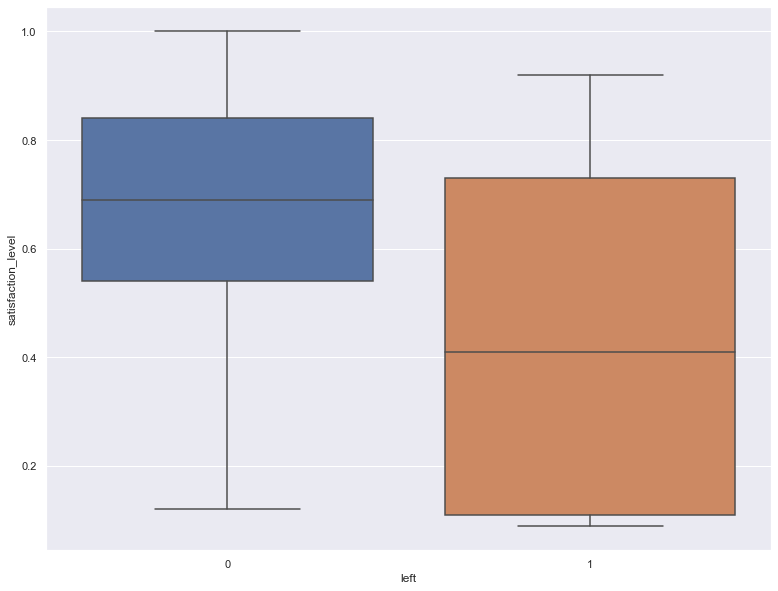

In [12]:
sns.boxplot('left', 'satisfaction_level', data=df)

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

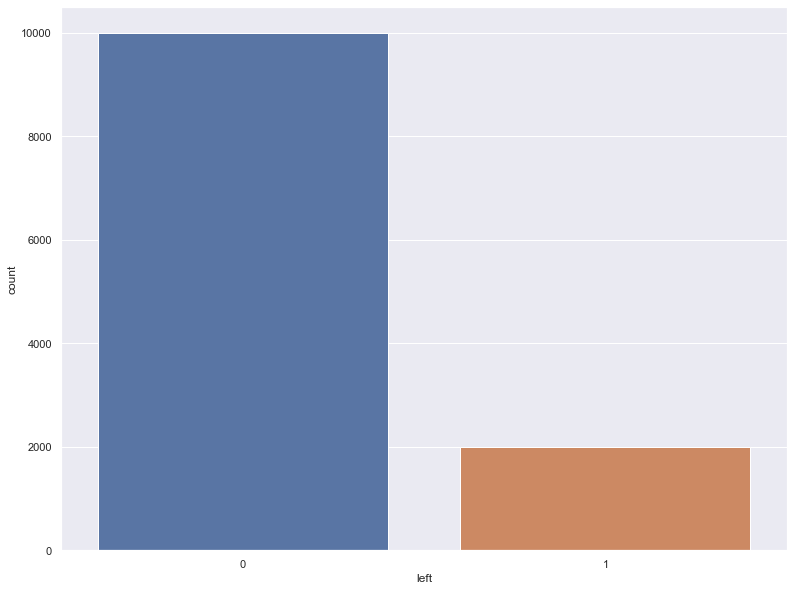

In [13]:
sns.countplot(df['left'])

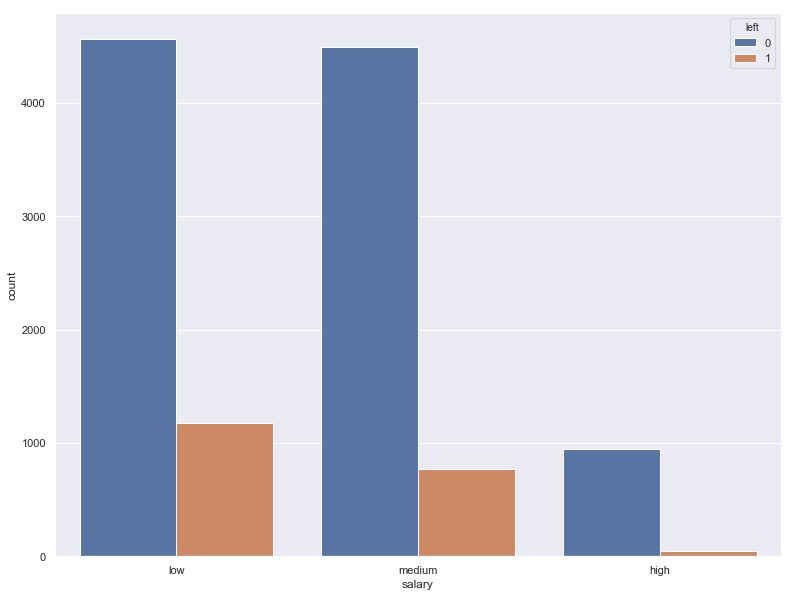

In [14]:
sns.countplot(x='salary', hue='left', data=df)

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

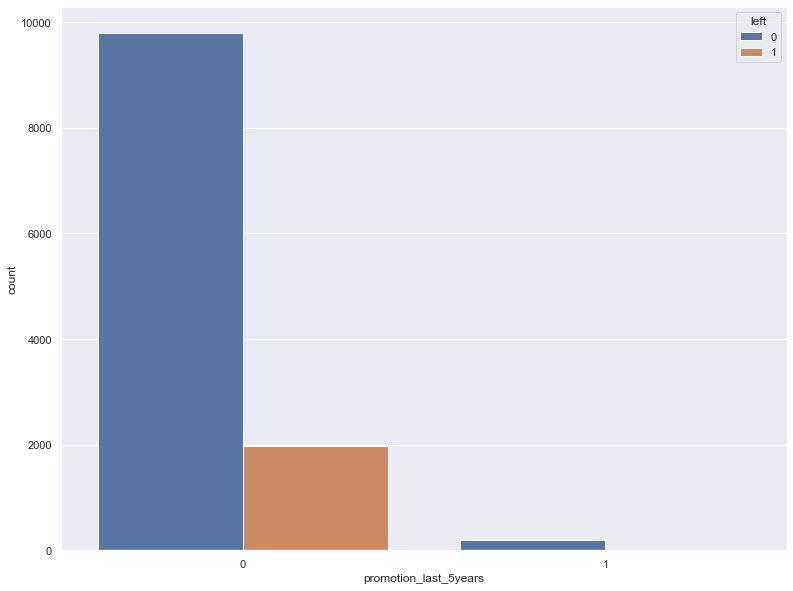

In [14]:
sns.countplot(df['promotion_last_5years'], hue=df['left'])

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Departments ', ylabel='last_evaluation'>

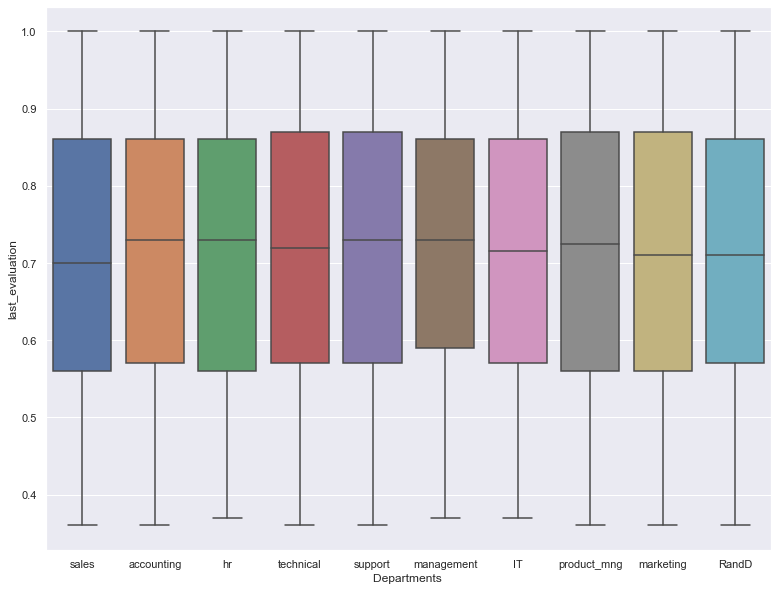

In [16]:
sns.boxplot('Departments ', 'last_evaluation', data=df)

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction_level', ylabel='last_evaluation'>

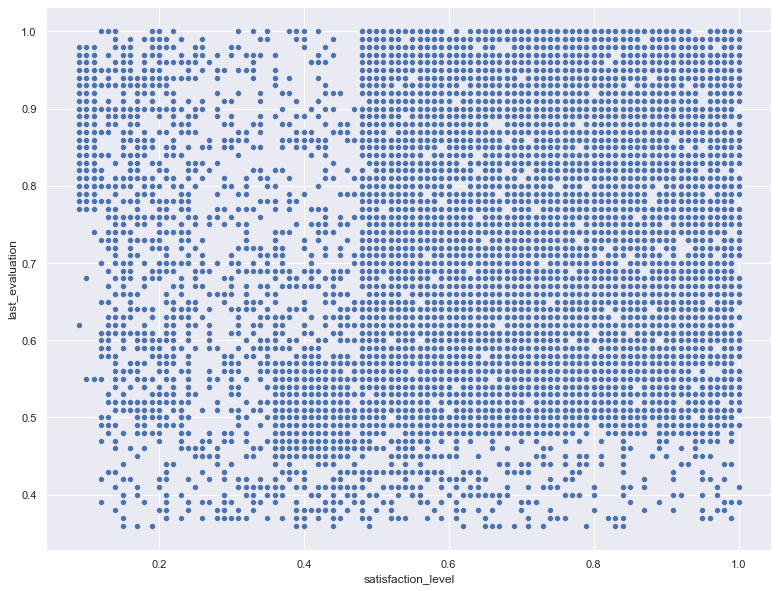

In [17]:
sns.scatterplot('satisfaction_level', 'last_evaluation', data=df)

C:\Users\azamm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

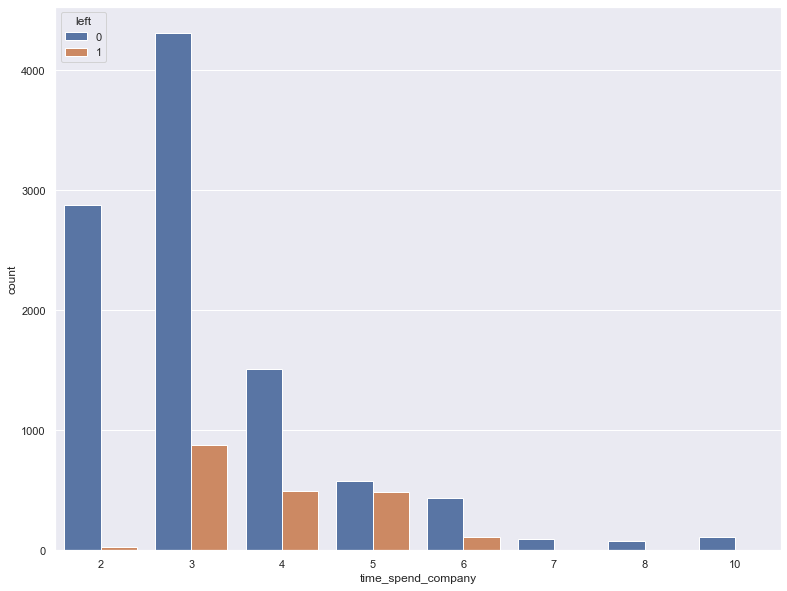

In [18]:
sns.countplot('time_spend_company', hue='left', data=df)

In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [21]:
# convert categorical data to numeric through one-hot encoding
# creat dummy variables from categorical variables in a pandas DataFrame.
df = pd.get_dummies(df, columns=['Departments ', 'salary'])
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments _IT', 'Departments _RandD',
       'Departments _accounting', 'Departments _hr', 'Departments _management',
       'Departments _marketing', 'Departments _product_mng',
       'Departments _sales', 'Departments _support', 'Departments _technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [22]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments _IT,Departments _RandD,...,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments _IT', 'Departments _RandD',
       'Departments _accounting', 'Departments _hr', 'Departments _management',
       'Departments _marketing', 'Departments _product_mng',
       'Departments _sales', 'Departments _support', 'Departments _technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [34]:
# specifying our features and target

x = df.drop('left', axis=1)
y = df['left']

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [35]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
# feature scaling

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [38]:
# check the first row of the scaled data
x[1]

array([ 0.70663718,  0.85137984,  1.02919412,  1.26270891,  1.9810364 ,
       -0.42711564, -0.13122844, -0.29766835, -0.24785528, -0.23370369,
       -0.22970761, -0.19424877, -0.24384996, -0.24633537,  1.64379699,
       -0.42315015, -0.47981734, -0.29998636, -0.95825523,  1.13102806])

In [39]:
# splitting the data into training and validation sets

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=1)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (9592, 20) (9592,)
Test set: (2399, 20) (2399,)


R2_score value for k= 1 is: 0.944977073780742
R2_score value for k= 2 is: 0.9541475614839516
R2_score value for k= 3 is: 0.9399749895789913
R2_score value for k= 4 is: 0.9483117965819091
R2_score value for k= 5 is: 0.9433097123801584
R2_score value for k= 6 is: 0.9433097123801584
R2_score value for k= 7 is: 0.9383076281784076
R2_score value for k= 8 is: 0.9403918299291372
R2_score value for k= 9 is: 0.933305543976657
R2_score value for k= 10 is: 0.932888703626511
R2_score value for k= 11 is: 0.929137140475198
R2_score value for k= 12 is: 0.929137140475198
R2_score value for k= 13 is: 0.9241350562734473
R2_score value for k= 14 is: 0.9220508545227178
R2_score value for k= 15 is: 0.9187161317215506
R2_score value for k= 16 is: 0.9191329720716965
R2_score value for k= 17 is: 0.9166319299708212
R2_score value for k= 18 is: 0.9162150896206753
R2_score value for k= 19 is: 0.9137140475197999
R2_score value for k= 20 is: 0.9153814089203834


<AxesSubplot:>

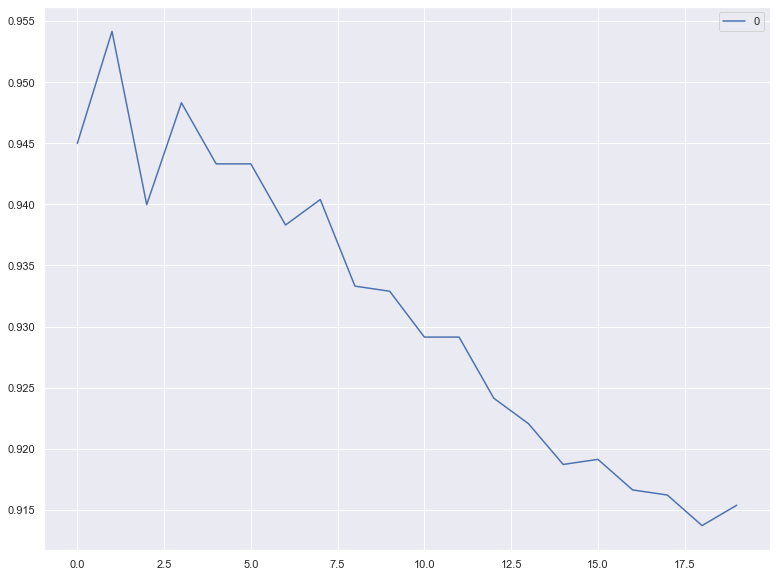

In [40]:
# our first model is the kNN
# here we create a function to find the best value of k, where accuracy is highest
#calculate the accuracy score for the model by comparing the predicted labels pred to the true labels y_test,
accuracy_value = [] #initialize an empty list to store the accuracy scores for each k value

for k in range(20):  #create a for loop that will iterate through the range of k values from 1 to 20
    k = k + 1
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    accuracy_value.append(acc)
    print('R2_score value for k=', k, 'is:', acc)
    
curve = pd.DataFrame(accuracy_value)
curve.plot()

In [41]:
accuracy_value

[0.944977073780742,
 0.9541475614839516,
 0.9399749895789913,
 0.9483117965819091,
 0.9433097123801584,
 0.9433097123801584,
 0.9383076281784076,
 0.9403918299291372,
 0.933305543976657,
 0.932888703626511,
 0.929137140475198,
 0.929137140475198,
 0.9241350562734473,
 0.9220508545227178,
 0.9187161317215506,
 0.9191329720716965,
 0.9166319299708212,
 0.9162150896206753,
 0.9137140475197999,
 0.9153814089203834]

In [42]:
# after identifying that highest accuracy is when k=2
# we develop the final model

model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test, pred)

acc

0.9541475614839516

In [43]:
# here we develop the second model, Decision Tree Classifier

dt_model = DecisionTreeClassifier()

#training the model
dt_model.fit(x_train, y_train)

#making predictions with our DT Classifier
dt_predictions = dt_model.predict(x_test)
dt_probabilities = dt_model.predict_proba(x_test)
dt_acc = accuracy_score(y_test, dt_predictions)
dt_acc

0.9699874947894956

In [44]:
# here we develop the third model, Logistic Regression

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

# predicting actual values of classes
our_pred = log_reg.predict(x_test)

# predicting probabilities of classes
our_probab = log_reg.predict_proba(x_test)

log_acc = accuracy_score(y_test, our_pred)
log_acc

0.8257607336390163

<AxesSubplot:>

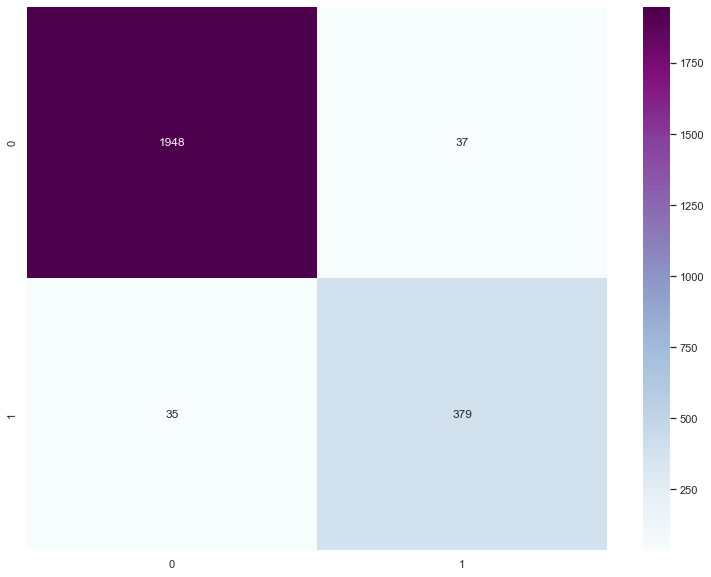

In [45]:
# confusion matrix for decision tree classifier

dt_cm = confusion_matrix(y_test, dt_predictions)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='BuPu')

<AxesSubplot:>

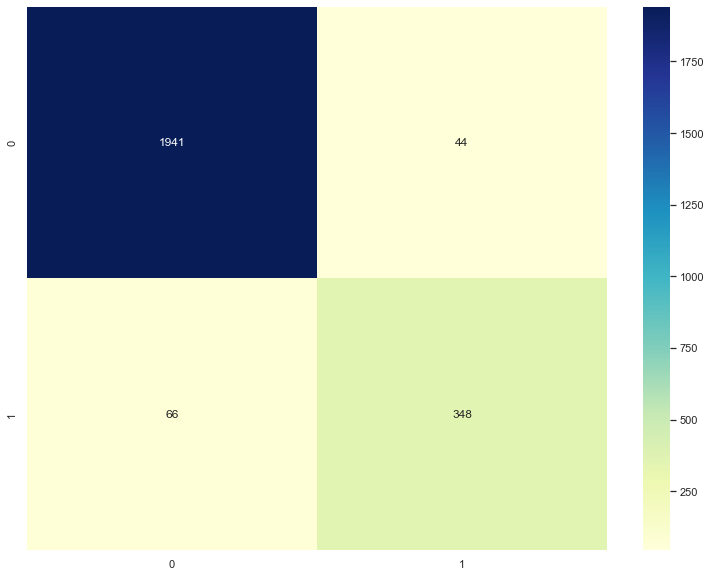

In [46]:
# confusion matrix for kNN, where we found k=2
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [47]:
# classification report for kNN

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1985
           1       0.89      0.84      0.86       414

    accuracy                           0.95      2399
   macro avg       0.93      0.91      0.92      2399
weighted avg       0.95      0.95      0.95      2399



In [48]:
# classification report for Decision Tree Classifier
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1985
           1       0.91      0.92      0.91       414

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [49]:
# classification report for Logistic Regression

print(classification_report(y_test, our_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1985
           1       0.49      0.21      0.29       414

    accuracy                           0.83      2399
   macro avg       0.67      0.58      0.60      2399
weighted avg       0.79      0.83      0.80      2399



**Precision**: How often the model is correct when making a prediction

**Recall**: How often the model can identify when an employee leaves the company

**F1-Score**: The weighted harmonic mean of the precision and recall of the test

In [50]:
# probabilities for DT

dt_probabilities

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [51]:
# probabilities for Logistic Regression

our_probab

array([[0.47631357, 0.52368643],
       [0.94092299, 0.05907701],
       [0.94229307, 0.05770693],
       ...,
       [0.43345559, 0.56654441],
       [0.68843419, 0.31156581],
       [0.88890874, 0.11109126]])

In [52]:
# evaluating our Logistic Regression model using Log Loss

log_loss(y_test, our_probab)

0.37986272239171864

In [53]:
# evaluating our DT model using Log Loss

log_loss(y_test, dt_probabilities)

1.0365952065167032